In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Machine Learning on Text: Clustering Assignment

In [2]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

### Ingest the company_profiles data set into a corpus.

In [4]:
PATH = "./company_profiles/company_profiles/"

DOC_PATTERN = r".*\.txt"

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

<IPython.core.display.Javascript object>

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [5]:
docs = [corpus.raw(file_id) for file_id in corpus.fileids()]

<IPython.core.display.Javascript object>

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [6]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []
    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
    return preprocessed

<IPython.core.display.Javascript object>

In [7]:
preprocessed = preprocess(docs)

<IPython.core.display.Javascript object>

### TF-IDF vectorize the preprocessed documents.

In [8]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)

<IPython.core.display.Javascript object>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

In [9]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectors)

<IPython.core.display.Javascript object>

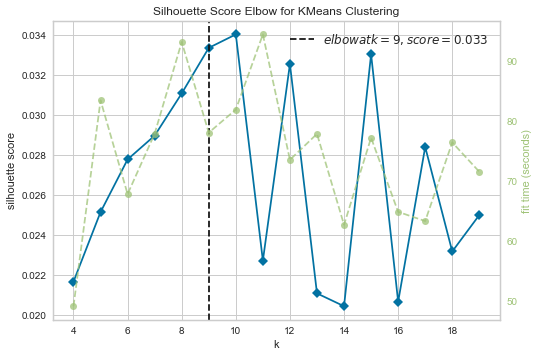

<IPython.core.display.Javascript object>

In [10]:
visualizer = KElbowVisualizer(model, k=(4, 20), metric="silhouette")
visualizer.fit(vectors)
visualizer.show()

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [15]:
model = KMeans(n_clusters=9)
clusters = model.fit_predict(vectors)

<IPython.core.display.Javascript object>

### Perform Agglomerative Clustering using the same number of clusters.

In [16]:
model_2 = AgglomerativeClustering(n_clusters=9)
clusters_2 = model_2.fit_predict(vectors.toarray())

<IPython.core.display.Javascript object>

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.